Note that we have manually saved the excel files as csv files, for both the training and the testing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import models as ms
import warnings

# options on max allowable columns in pandas
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train.csv')
train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,XC,y
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.644439,-0.356251,-1.188522,0.646979,-1.018895,-0.153524,-0.102938,1.109257,0.173160,-0.188674,-0.088169,0.843558,1.075656,1.770062,-2.276914,0.136055,1.258887,0.311050,-0.468410,-1.267298,0.828288,-1.362069,-2.267345,0.329806,0.255234,-1.145799,0.673261,-0.072575,0.233888,A,1
2996,0.427700,1.460896,-1.260326,2.206359,-0.981929,0.045186,0.406928,-0.409999,0.602068,-1.145479,0.556425,-0.157087,1.636547,0.860019,0.493489,-1.179582,-0.223230,-0.191313,-0.334412,-1.815481,2.045879,0.350893,0.558446,-1.430444,0.067506,-0.865400,0.571944,1.172911,-0.917354,0.126003,C,0
2997,-0.880540,0.678472,0.493897,-0.118869,0.005285,-0.201233,-0.601732,-0.747260,-0.413440,-1.144848,0.620897,-0.606322,-1.050082,-0.223199,-1.213268,0.094096,1.385225,1.131449,-2.645446,-2.195989,-0.615433,1.959871,0.924523,-0.304820,0.153800,0.316073,0.243841,-1.641217,0.287025,0.591607,B,1
2998,0.151291,-0.949928,-1.960683,-1.352557,2.221015,-0.775556,0.932388,-0.963642,0.649496,-1.658190,1.491049,0.325477,0.077016,-0.563154,-0.598902,0.173198,1.100410,-0.191733,-1.457368,-0.085871,0.786170,-1.576338,0.896517,-0.586427,-0.314806,-0.048052,0.142921,1.057203,-1.335579,-0.108947,B,0


## Step 1: Coarse Model Comparison

- In order to get a basic idea on the performances of multiple models, we first do coarse model comparison, including Logistic regression with L1 penalty and L2 penalty, LDA, CART, Naive Bayes, Linear Support Vector Machine with L1 and L2 penalty, LightGBM, XGBoost, Catboost. We consider AUC, accuracy, F1, and weighted F1 as the metrics.
- As for encoding of the categorical variable, we start with the most general setting: one-hot encoding. In this way, each factor level is represented by one coefficient.
- Since the data is imbalanced, although not severe, [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) is used to do cross validation. 
- All functions are in `functions.py`. Refer to this file for detailed documentation for the variables.

Findings:
- LR, LDA, SVM are the best perfoming models, and they are all linear. While for the gradient boosting methods, which are better at modeling non-linear relationship, perform worse. This suggests that a linear relationship should be more plausible.

In [3]:
## specify candidate models and evalutation metrics
# specify parameters for models
lr_l1_params = {
    'penalty': 'l1',
    'solver': 'liblinear',
    'max_iter': 200,
}
lr_l2_params = {
    'penalty': 'l2',
    'solver': 'saga',
    'max_iter': 200,
}
lda_params = {}
knn_params = {}
cart_params = {}
nb_params = {}
svm_l1_params = {
    'penalty': 'l1', 
    'loss': 'squared_hinge', 
    'dual': False, 
    'tol': 1e-3, 
}
svm_l2_params = {
    'penalty': 'l2', 
    'loss': 'squared_hinge', 
    'dual': False, 
    'tol': 1e-3, 
}
lgbm_params = {}
xgb_params = {}
cat_params = {
    'verbose': 0,
}

# specify candidate models and corresponding parameters
model_types = ['LR', 'LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'SVM', 'LGBM', 'XGBoost', 'CatBoost', ] 
model_params = [lr_l1_params, lr_l2_params, lda_params, knn_params, cart_params, nb_params, \
                svm_l1_params, svm_l2_params, lgbm_params, xgb_params , cat_params, ]
model_names = ['LR_l1', 'LR_l2', 'LDA', 'KNN', 'CART', 'NB', 'SVM_l1', 'SVM_l2', 'LGBM', 'XGBoost', 'CatBoost', ] 

# specify evaluation metrics
scoring = {
    'auc': 'roc_auc', 
    'accuracy': 'accuracy', 
    'f1': 'f1', 
    'f1_weighted': 'f1_weighted',
}

Running LR_l1...	LR_l1 done!
Running LR_l2...	LR_l2 done!
Running LDA...	LDA done!
Running KNN...	KNN done!
Running CART...	CART done!
Running NB...	NB done!
Running SVM_l1...	SVM_l1 done!
Running SVM_l2...	SVM_l2 done!
Running LGBM...	LGBM done!
Running XGBoost...	XGBoost done!
Running CatBoost...	CatBoost done!
Model Comparison Diagram
It has been saved to '../images/onehot/model_compare.pdf'.


<Figure size 720x576 with 0 Axes>

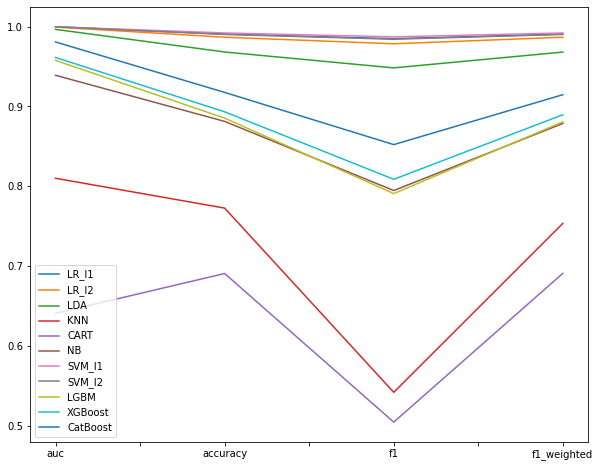

Boxplot for algorithm comparison in terms of auc.
It has been saved to '../images/onehot/model_compare_auc.pdf'.


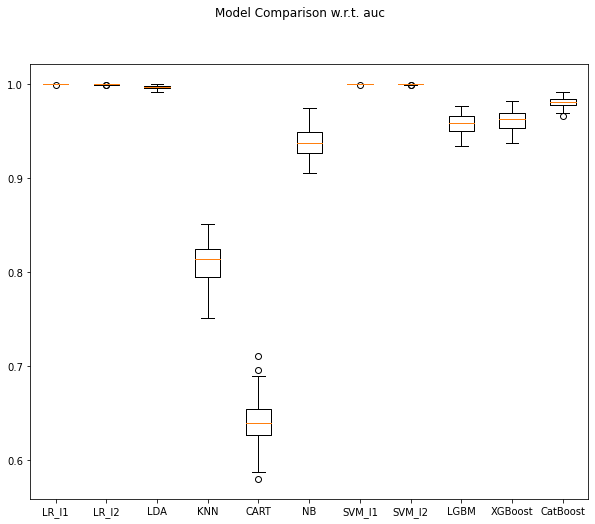

Boxplot for algorithm comparison in terms of accuracy.
It has been saved to '../images/onehot/model_compare_accuracy.pdf'.


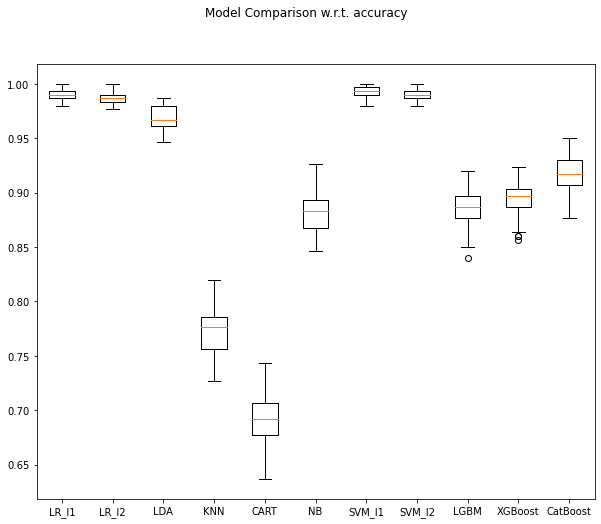

Boxplot for algorithm comparison in terms of f1.
It has been saved to '../images/onehot/model_compare_f1.pdf'.


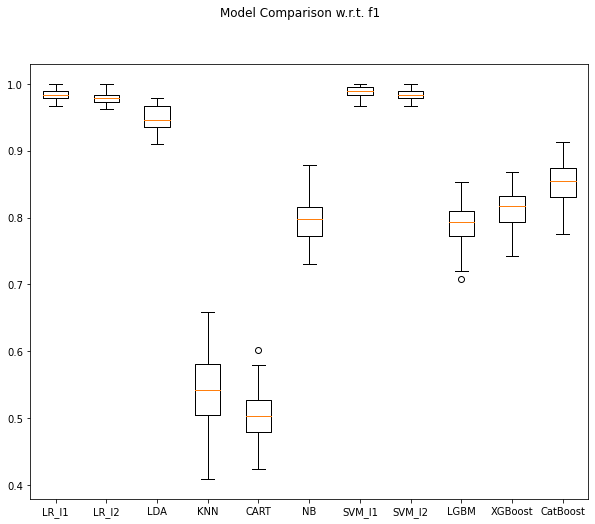

Boxplot for algorithm comparison in terms of f1_weighted.
It has been saved to '../images/onehot/model_compare_f1_weighted.pdf'.


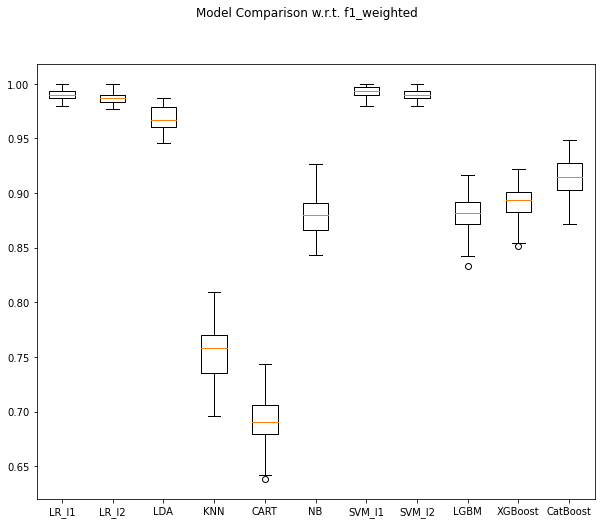

In [4]:
## Model comparison under one-hot encoding scheme
# preprocess the data with one-hot encoding
train = pd.read_csv('../data/train.csv')
train = ms.encode(train, 'onehot')
X = train.drop(columns = ['y'])
y = train['y']
# perform model comparison
onehot_results, onehot_compare_df, onehot_compare_plot_df = ms.model_compare(X, y, model_types, model_params, \
                                                                             model_names, scoring, \
                                                                             image_dir = '../images/onehot', display=True)

In [5]:
onehot_compare_df.sort_values(by=['auc', 'accuracy', 'f1', 'f1_weighted'], ascending=False)

,auc,accuracy,f1,f1_weighted
SVM_l1,0.99981 ( 0.00019),0.99207 ( 0.00512),0.98719 ( 0.00826),0.99206 ( 0.00512)
SVM_l2,0.99976 ( 0.00024),0.99020 ( 0.00527),0.98418 ( 0.00852),0.99020 ( 0.00527)
LR_l1,0.99976 ( 0.00023),0.99067 ( 0.00503),0.98488 ( 0.00818),0.99065 ( 0.00504)
LR_l2,0.99941 ( 0.00045),0.98673 ( 0.00645),0.97849 ( 0.01048),0.98671 ( 0.00646)
LDA,0.99653 ( 0.00178),0.96820 ( 0.01130),0.94828 ( 0.01839),0.96811 ( 0.01133)
CatBoost,0.98077 ( 0.00529),0.91753 ( 0.01526),0.85211 ( 0.03036),0.91466 ( 0.01638)
XGBoost,0.96135 ( 0.00977),0.89320 ( 0.01659),0.80863 ( 0.03263),0.88951 ( 0.01773)
LGBM,0.95764 ( 0.00979),0.88533 ( 0.01489),0.79071 ( 0.02969),0.88057 ( 0.01596)
NB,0.93900 ( 0.01644),0.88120 ( 0.01854),0.79454 ( 0.03449),0.87858 ( 0.01935)
KNN,0.80992 ( 0.02452),0.77253 ( 0.02054),0.54162 ( 0.05056),0.75335 ( 0.02418)


We found that 'SVM_l1', 'SVM_l2', 'LR_l1', 'LR_l2', 'LDA' are the top 5 well-performing models. Their metrics are very close to each other, so let us take a closer look at the comparison plot.

As we can see, `SVM_l1` is the best one in terms of all metrics.

Finer Model Comparison Diagram


<Figure size 576x432 with 0 Axes>

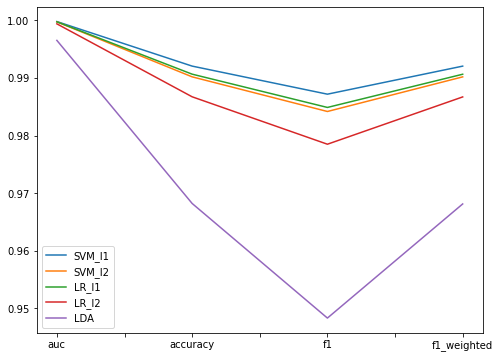

In [6]:
# take a closer look at the comparison plot
plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
onehot_compare_plot_df[['SVM_l1', 'SVM_l2', 'LR_l1', 'LR_l2', 'LDA']].plot()
plt.legend(loc='best')
print(f"Finer Model Comparison Diagram")
plt.savefig("../images/onehot/top5_model_compare.pdf")
plt.show()

## Step 2: Dive deeper into L1-regularized SVM

- In Step 1, we found that l1-regularized SVM is the best-performing model, so we decided to dive deeper and check its coefficients in the hope of finding some structual information.
- As we can see in the `coef_df` result, the coefficient for the categorical variables are approximately [2.5, 0, -2.5, -5, -7.5], which suggests that the difference between two adjacent factor levels are the same and hence it might be better if we use ordinal encoding. To make such a pattern easier to spot for nake eyes, we plotted the coefficients out and the green dots represent the categorical features. A downward linear pattern is very clear. Also, we can scale the coefficients to see the pattern clearly. We used MinMaxScaler with a multiplier 4. As we can see in the `scaled_coef_df`, the coefficients for the categorical variable, are very close to [4, 3, 2, 1, 0].
- All the above tell us that ordinal encoding might be appropriate. Therefore, we decide to try ordinal encoding in Step 3.

In [7]:
## fit a l1-regularized SVM
np.random.seed(99) # set a seed for reproducibility
train = pd.read_csv('../data/train.csv')
train = ms.encode(train, 'onehot')
X = train.drop(columns = ['y'])
y = train['y']
svm_l1_params = {
    'penalty': 'l1', 
    'loss': 'squared_hinge', 
    'dual': False, 
    'tol': 1e-3, 
}
model = ms.model_init('SVM', **svm_l1_params)
model.fit(X, y)
coef_df = pd.DataFrame(model.coef_[0].reshape(1, -1), index=[0], columns=X.columns)
coef_df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X_A,X_B,X_C,X_D,X_E
0,0.036534,0.030191,-2.680076,-2.617866,-2.614526,0.040446,-2.603064,-2.585802,-0.027194,-0.00686,0.0,-2.595467,-0.014203,0.026846,0.012906,-2.579457,0.04015,-2.608736,0.000415,-2.652319,-2.613898,-2.645435,-2.65635,0.080488,0.053938,-2.619766,-2.641279,-2.697076,0.022468,0.036541,2.565274,0.001774,-2.722318,-5.181473,-7.881363


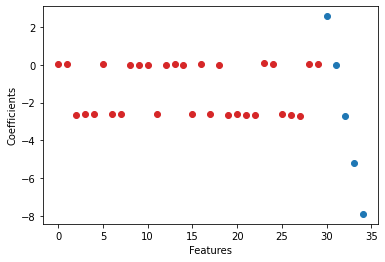

In [8]:
# plot of svm coefficients
plt.rcParams["figure.figsize"] = (6,4)
plt.figure()
plt.plot(range(coef_df.shape[1]-5), coef_df.iloc[0, :-5], 'o', 
        color = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392))
plt.plot(range(coef_df.shape[1]-5, coef_df.shape[1]), coef_df.iloc[0, -5:], 'o', 
         color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765))                                    
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.savefig('../images/svm_coef.pdf')
plt.show()

In [9]:
# scale the coefficients to see a clearer pattern
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_coef_df = coef_df.copy()
scaled_coef_df.iloc[0] = scaler.fit_transform(coef_df.T).T * 4
scaled_coef_df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X_A,X_B,X_C,X_D,X_E
0,3.03175,3.029321,1.991564,2.015384,2.016663,3.033248,2.021052,2.027662,3.007348,3.015134,3.017761,2.023961,3.012323,3.02804,3.022702,2.030091,3.033134,2.01888,3.01792,2.002192,2.016903,2.004828,2.000649,3.04858,3.038413,2.014657,2.00642,1.985055,3.026364,3.031752,4.0,3.01844,1.97539,1.033783,0.0


## Step 3: Redo Model Comparison with Ordinal Encoding

- For this step, we use ordinal encoding: [A, B, C, D, E] => [0, 1, 2, 3, 4].

Findings:
- Comparing the results with the case where one-hot encoding is used, all the metrics get boosted, which suggests that ordinal encoding should be preferred.

Running LR_l1...	LR_l1 done!
Running LR_l2...	LR_l2 done!
Running LDA...	LDA done!
Running KNN...	KNN done!
Running CART...	CART done!
Running NB...	NB done!
Running SVM_l1...	SVM_l1 done!
Running SVM_l2...	SVM_l2 done!
Running LGBM...	LGBM done!
Running XGBoost...	XGBoost done!
Running CatBoost...	CatBoost done!
Model Comparison Diagram
It has been saved to '../images/ordinal/model_compare.pdf'.


<Figure size 720x576 with 0 Axes>

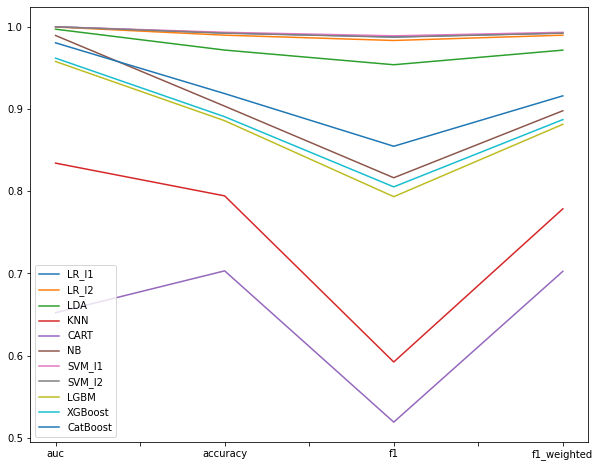

Boxplot for algorithm comparison in terms of auc.
It has been saved to '../images/ordinal/model_compare_auc.pdf'.


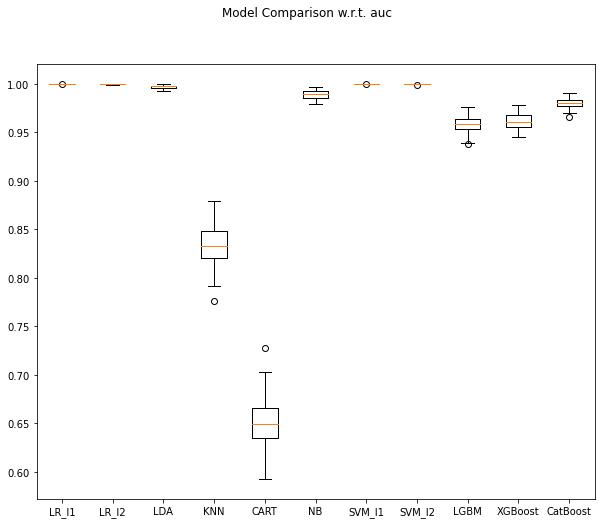

Boxplot for algorithm comparison in terms of accuracy.
It has been saved to '../images/ordinal/model_compare_accuracy.pdf'.


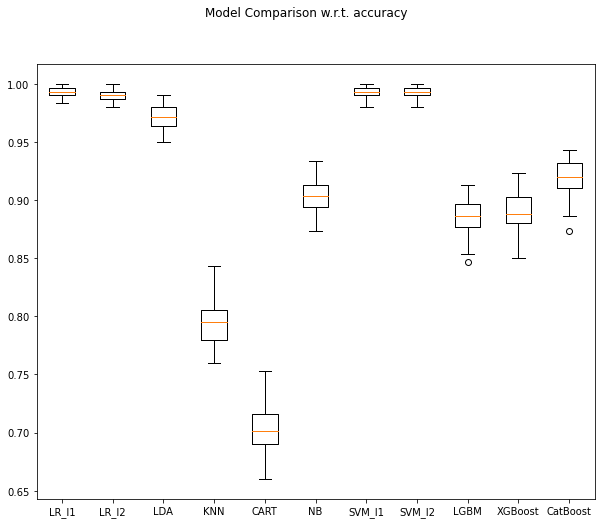

Boxplot for algorithm comparison in terms of f1.
It has been saved to '../images/ordinal/model_compare_f1.pdf'.


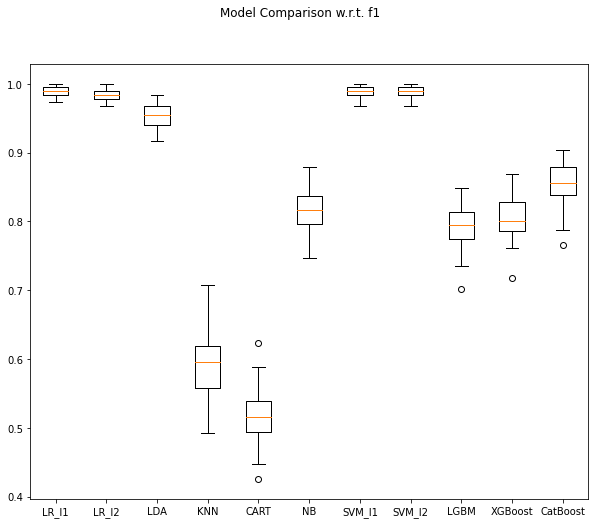

Boxplot for algorithm comparison in terms of f1_weighted.
It has been saved to '../images/ordinal/model_compare_f1_weighted.pdf'.


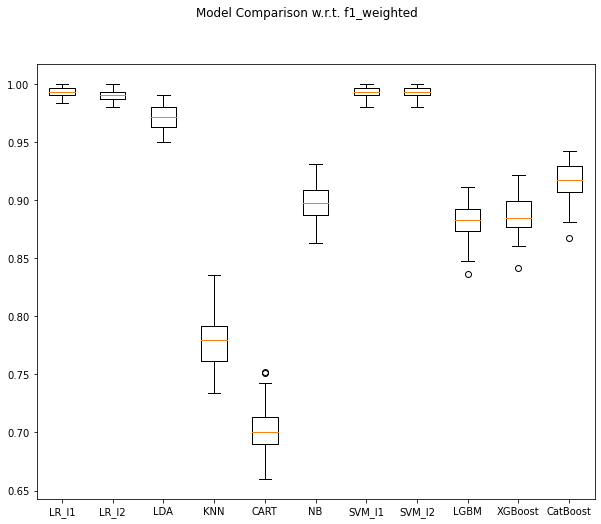

In [10]:
## Model comparison under ordinal encoding scheme
# preprocess the data with ordinal encoding
train = pd.read_csv('../data/train.csv')
train = ms.encode(train, 'ordinal')
X = train.drop(columns = ['y'])
y = train['y']
# perform model comparison. Note that candidate models are the same as those in one-hot setting
ordinal_results, ordinal_compare_df, ordinal_compare_plot_df = ms.model_compare(X, y, model_types, model_params, \
                                                                             model_names, scoring, \
                                                                             image_dir = '../images/ordinal', display=True)

In [11]:
ordinal_compare_df.sort_values(by=['auc', 'accuracy', 'f1', 'f1_weighted'], ascending=False)

,auc,accuracy,f1,f1_weighted
SVM_l1,0.99986 ( 0.00015),0.99313 ( 0.00478),0.98887 ( 0.00778),0.99312 ( 0.00479)
LR_l1,0.99985 ( 0.00016),0.99233 ( 0.00412),0.98758 ( 0.00669),0.99232 ( 0.00413)
SVM_l2,0.99980 ( 0.00019),0.99213 ( 0.00484),0.98726 ( 0.00786),0.99212 ( 0.00485)
LR_l2,0.99963 ( 0.00030),0.98967 ( 0.00496),0.98320 ( 0.00812),0.98964 ( 0.00498)
LDA,0.99692 ( 0.00169),0.97153 ( 0.01029),0.95369 ( 0.01677),0.97145 ( 0.01032)
NB,0.98924 ( 0.00436),0.90333 ( 0.01320),0.81624 ( 0.02964),0.89773 ( 0.01497)
CatBoost,0.98033 ( 0.00499),0.91860 ( 0.01452),0.85453 ( 0.02909),0.91587 ( 0.01562)
XGBoost,0.96171 ( 0.00813),0.89047 ( 0.01543),0.80516 ( 0.02990),0.88697 ( 0.01641)
LGBM,0.95763 ( 0.00859),0.88560 ( 0.01454),0.79320 ( 0.03079),0.88125 ( 0.01591)
KNN,0.83402 ( 0.02241),0.79420 ( 0.01920),0.59214 ( 0.04461),0.77845 ( 0.02195)


Similar to what we have done under the onehot scenario, let us take a closer look at the top 5 classifiers. Again, `SVM_l1` is the best in terms of all metrics.

Finer Model Comparison Diagram


<Figure size 576x432 with 0 Axes>

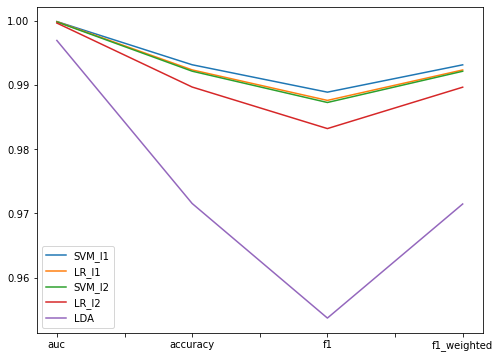

In [12]:
# take a closer look at the comparison plot
plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
ordinal_compare_plot_df[['SVM_l1', 'LR_l1', 'SVM_l2', 'LR_l2', 'LDA']].plot()
plt.legend(loc='best')
print(f"Finer Model Comparison Diagram")
plt.savefig("../images/ordinal/top5_model_compare.pdf")
plt.show()

## Prediction

After exploration, we reach our final classifier:
$$
0.5\times (1 - \text{Sign}(X_2 + X_3 + X_4 + X_6 + X_7 + X_{11} + X_{15} + X_{17} + X_{19} + X_{20} + X_{21} + 
X_{22} + X_{25} + X_{26} + X_{27} + X_{C})).
$$


### Check the prediction on the train set

In [13]:
from sklearn.metrics import f1_score

In [14]:
# read in and encode train data
train = pd.read_csv('../data/train.csv')
train = ms.encode(train, 'ordinal')

# make predictions
train_Z = train['X2'] + train['X3'] + train['X4'] + train['X6'] + train['X7'] + train['X11'] + train['X15'] + train['X17'] + \
        train['X19'] + train['X20'] + train['X21'] + train['X22'] + train['X25'] + train['X26'] + train['X27'] + train['XC']
train_pred = round(0.5 * (1 - np.sign(train_Z))).astype(int)

# evaluate predictions
print(f"The F1 score on the training set is: {f1_score(train['y'], train_pred)}.")

# get the decision boundary
margin = (max(train_Z[train_Z < 0]), min(train_Z[train_Z > 0]))
print(f"The decision boundary of the SVM classifier is: {margin}.")

The F1 score on the training set is: 1.0.
The decision boundary of the SVM classifier is: (-0.0027541669145945136, 0.0013290685396867286).


### Make prediction on the test set

In [15]:
# read in and encode test data
test = pd.read_csv('../data/test.csv')
test = ms.encode(test, 'ordinal')

# make prediction
Z = test['X2'] + test['X3'] + test['X4'] + test['X6'] + test['X7'] + test['X11'] + test['X15'] + test['X17'] + \
        test['X19'] + test['X20'] + test['X21'] + test['X22'] + test['X25'] + test['X26'] + test['X27'] + test['XC']
test['prediction_score'] = round(0.5 * (1 - np.sign(Z))).astype(int)

# check how many decison values fall into the margin 
print(f"Predictive uncertainty analysis: ")
print(f"{sum((Z >= margin[0]) & (Z <= margin[1]))} out of {test.shape[0]} would fall into the decision boundary.")

# save the prediction file
test.to_csv('../data/pred.csv', index=False)

Predictive uncertainty analysis: 
1 out of 7000 would fall into the decision boundary.


### Visualization of the decision boundary

([], [])

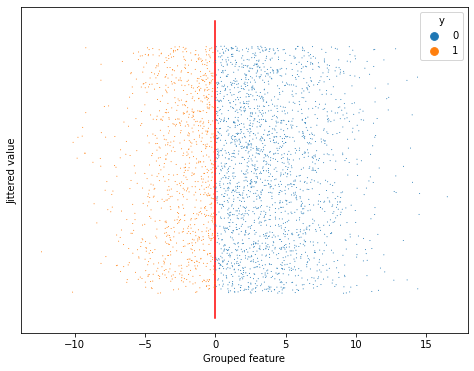

In [16]:
import seaborn as sns

# transform data
train = pd.read_csv('../data/train.csv')
train = ms.encode(train, 'ordinal')
train['Z'] = train['X2'] + train['X3'] + train['X4'] + train['X6'] + train['X7'] + train['X11'] + \
    train['X15'] + train['X17'] + train['X19'] + train['X20'] + train['X21'] + train['X22'] + \
    train['X25'] + train['X26'] + train['X27'] + train['XC']
train["all1"] = 1
#ax = sns.stripplot(x="y", y="grouped", data=train, size = 1)
#plt.plot([-0.2,1.2], [0,0])
ax = sns.stripplot(y = "all1", x="Z", hue = "y", data=train, size = 1, orient = "h")
plt.xlabel('Grouped feature')
plt.ylabel('Jittered value')
plt.plot([0,0], [-0.12,0.12], color = "red")
plt.yticks([])

([], [])

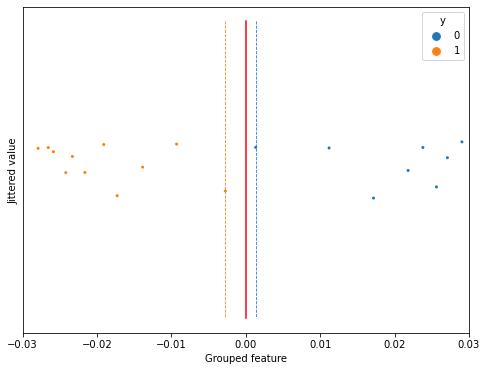

In [17]:
# zoom in to take a closer look
ax = sns.stripplot(y = "all1", x="Z", hue = "y", data=train, size = 3, orient = "h")
plt.xlabel('Grouped feature')
plt.ylabel('Jittered value')
plt.xlim((-0.03, 0.03))
plt.plot([0,0], [-0.5,0.5], color = "red")
plt.plot([0.00132906,0.00132906], [-0.5,0.5], color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), ls = "--", lw = 0.8)
plt.plot([-0.002754167,-0.002754167], [-0.5,0.5], color = (1.0, 0.4980392156862745, 0.054901960784313725), ls = "--", lw = 0.8)
plt.yticks([])